Name-Ankitkumar R Chaudhary

Task-06 Prediction using Decision Tree Algo

- For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.
- The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.


In [33]:
#Impoting required libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [34]:
iris = datasets.load_iris()          #loading our iris dataset

In [35]:
iris.keys()    #listing the various colums present in our dataset

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [36]:
x=pd.DataFrame(iris.data, columns=iris.feature_names)     #Keeping our Feature variables in input variable x
y = pd.DataFrame(iris.target)    #target variable

In [58]:
data = pd.DataFrame(x)

In [59]:
data['Species'] = pd.DataFrame(y)

In [60]:
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
y.describe()

,0
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [40]:
y.value_counts()   # Here we have equal distribution of all the three classes

2    50
1    50
0    50
dtype: int64

Above we can see we have three classes with values as 0,1,2 where,

*   0 is Iris-setosa
*   1 is Iris-versicolor
*   2 is Iris-virginica







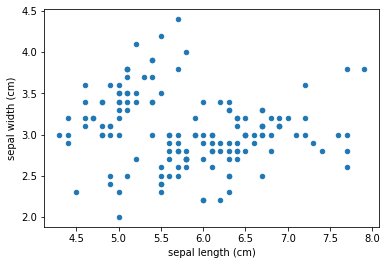

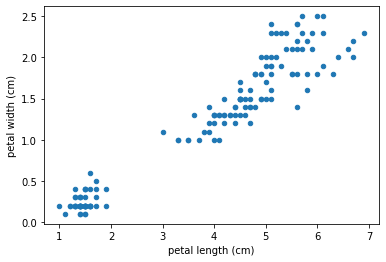

In [42]:
x.plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)')
x.plot(kind='scatter',x='petal length (cm)',y='petal width (cm)')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


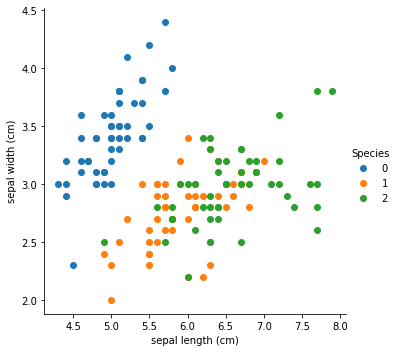

In [74]:
sns.FacetGrid(data, hue="Species", size=5) .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") .add_legend()

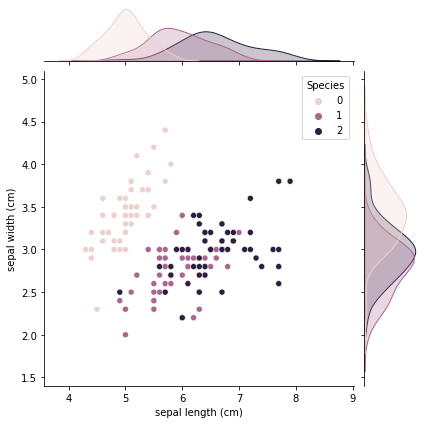

In [65]:
sns.jointplot(data=data, x="sepal length (cm)", y="sepal width (cm)", hue='Species')
#sns.add_legend()

## **Model Building**

In [ ]:
from sklearn.tree import DecisionTreeClassifier     #Using Decision tree

In [ ]:
model = DecisionTreeClassifier()   

model = DecisionTreeClassifier(criterion="entropy", max_depth=3)   #In case of tuning parameters 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =1 )    #splitting our dataset with 20% as test data

In [ ]:
model.fit(x_train,y_train)    #Fitting our training data with default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

criterion :This parameter allows us to use the different-different attribute selection measure. Supported criteria are gini for the Gini index and entropy for the information gain.

splitter :This parameter allows us to choose the split strategy. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

max_depth :The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting







In [ ]:
y_pred = model.predict(x_test)  #Predicting our test data on our model

In [ ]:
#Evaluating Model
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9666666666666667

So we can see that we are getting nice accuracy on our predicted data with original data. Incase if we get a low accuracy we can tune the parameters which is coommented above in 9th cell.

##**Visualizing Decision tree**

In [ ]:
# Installing required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


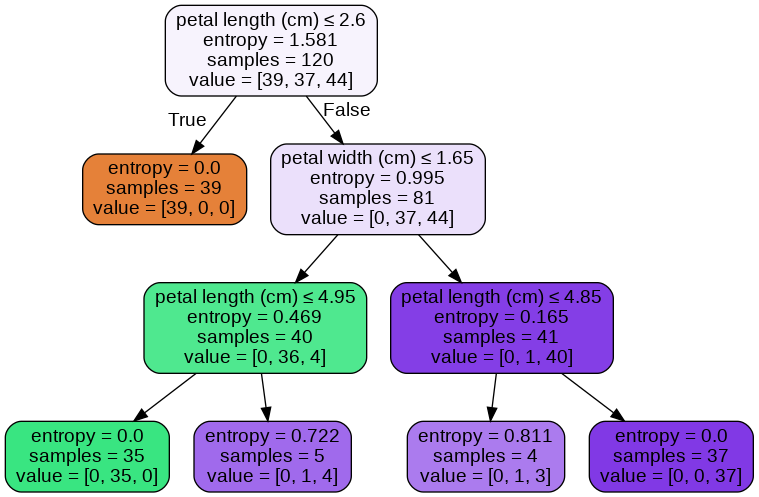

In [ ]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Prediciting with new data

In [ ]:
new_data = [5.9,3,5.1,1.8]
value = model.predict([new_data])      #Here we are passing our data to check how well our model is.

In [ ]:
Species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

In [ ]:
Species[value[0]]    #So here we can see our decision tree classifier has classified our data correctly!!!!!

'Iris-virginica'

In [ ]:
print('So according to your given data {} this flower belongs to species {}'.format(new_data,Species[value[0]]))

So according to your given data [5.9, 3, 5.1, 1.8] this flower belongs to species Iris-virginica
